In [71]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

#Metrics 
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import GridSearchCV
#from lwoku import RANDOM_STATE, N_JOBS, VERBOSE, get_prediction
#from grid_search_utils import plot_grid_search, table_grid_search

from sklearn.metrics import classification_report, recall_score, precision_score, accuracy_score

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

## Load the Data

- Data has 20000 observations and 21 variables initially

In [4]:
train_df = pd.read_csv("bank_mkt_train.csv")

In [5]:
train_df.head(5)

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,thu,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,mon,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,tue,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [6]:
train_df.shape

(20000, 21)

In [7]:
train_df.dtypes

client_id           int64
age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe           int64
dtype: object

Non Categorical Variables

In [8]:
# numerical 
non_cat_cols = list(train_df.select_dtypes(exclude=['object']))
non_cat_cols

['client_id',
 'age',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'subscribe']

Categorical Variables

In [9]:
### categorical
category_cols = list(train_df.select_dtypes(include=['object']))
category_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

Number of Subscribers

In [10]:
train_df[["client_id","subscribe"]].groupby(["subscribe"]).count()

,client_id
subscribe,
0,17729
1,2271


<AxesSubplot:title={'center':'subscribers counts'}>

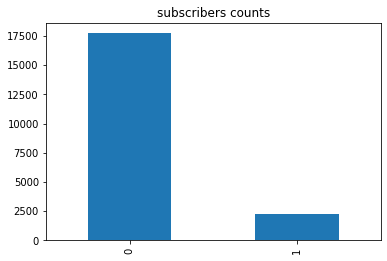

In [11]:
#Subscribers Count
value_counts = train_df['subscribe'].value_counts()
value_counts.plot.bar(title = 'subscribers counts')

# Data Cleaning

In [12]:
train_df.isna().sum()

client_id           0
age               202
job               161
marital           199
education         170
default           214
housing           195
loan              219
contact           217
month             199
day_of_week       185
campaign          203
pdays             185
previous          209
poutcome          175
emp.var.rate      165
cons.price.idx    181
cons.conf.idx     197
euribor3m         204
nr.employed       184
subscribe           0
dtype: int64

Replacing NAs in Categorical Features with Mode  and 
          NAs in NON Categorical Features with Median

In [13]:
for column in train_df:
    if train_df[column].isnull().any():
         if(column in category_cols):
            train_df[column]=train_df[column].fillna(train_df[column].mode()[0])


In [14]:
train_df

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,thu,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,mon,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,tue,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13724,45.0,unknown,unknown,unknown,no,yes,yes,cellular,jul,wed,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,1
19996,29863,26.0,admin.,single,university.degree,no,yes,no,cellular,may,mon,2.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.299,5099.1,0
19997,9841,33.0,admin.,married,high.school,no,yes,yes,cellular,may,mon,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.299,5099.1,0
19998,36432,43.0,admin.,married,high.school,no,yes,no,telephone,jul,mon,10.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0


In [15]:
train_df = train_df.fillna(0)

In [16]:
train_df.isna().sum()

client_id         0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribe         0
dtype: int64

Fixing Age 

In [17]:
train_df.dtypes

client_id           int64
age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribe           int64
dtype: object

In [18]:
train_df['age_group'] = 'unknown'
train_df.loc[train_df['age']  < 10 ,['age_group']] = '0_10'
train_df.loc[(train_df['age'] > 9) & (train_df['age']< 20) ,['age_group']] = '10'
train_df.loc[(train_df['age'] > 19) & (train_df['age']< 30) ,['age_group']] = '20'
train_df.loc[(train_df['age'] > 29) & (train_df['age']< 40) ,['age_group']] = '30'
train_df.loc[(train_df['age'] > 39) & (train_df['age']< 50) ,['age_group']] = '40'
train_df.loc[(train_df['age'] > 49) & (train_df['age']< 60) ,['age_group']] = '50'
train_df.loc[(train_df['age'] > 59) & (train_df['age']< 70) ,['age_group']] = '60'
train_df.loc[(train_df['age'] > 69) & (train_df['age']< 80) ,['age_group']] = '70'
train_df.loc[(train_df['age'] > 79) & (train_df['age']< 90) ,['age_group']] = '80'
train_df.loc[train_df['age'] > 89 ,['age_group']] = '90'

In [19]:
train_df

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,age_group
0,29925,42.0,management,married,basic.9y,no,no,no,cellular,jul,thu,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0,40
1,37529,35.0,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,4.0,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0,30
2,2757,44.0,technician,married,basic.9y,no,yes,yes,cellular,may,mon,1.0,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0,40
3,9642,45.0,services,married,high.school,no,yes,no,cellular,apr,tue,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0,40
4,14183,45.0,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13724,45.0,unknown,unknown,unknown,no,yes,yes,cellular,jul,wed,1.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,1,40
19996,29863,26.0,admin.,single,university.degree,no,yes,no,cellular,may,mon,2.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.299,5099.1,0,20
19997,9841,33.0,admin.,married,high.school,no,yes,yes,cellular,may,mon,1.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.299,5099.1,0,30
19998,36432,43.0,admin.,married,high.school,no,yes,no,telephone,jul,mon,10.0,999.0,0.0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,0,40


In [20]:
#Dropping Age 
del train_df['age']

ONE HOT ENCODING CATEGORICAL VARIABLES 

In [21]:
cols = train_df[['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','age_group']]

In [22]:
data = train_df.copy()
for col in cols:
    data_ohe = pd.get_dummies(data[col], prefix=col)
    data = pd.concat((data, data_ohe), axis=1).drop(col, axis=1)

In [23]:
data

,client_id,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_group_0_10,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_60,age_group_70,age_group_80,age_group_90
0,29925,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,37529,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,2757,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,9642,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,14183,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13724,1.0,999.0,0.0,1.4,93.918,-42.7,4.957,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
19996,29863,2.0,999.0,1.0,-1.8,92.893,-46.2,1.299,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
19997,9841,1.0,999.0,1.0,-1.8,92.893,-46.2,1.299,5099.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
19998,36432,10.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [24]:
data['target'] = data['subscribe']
del data['subscribe']
data

,client_id,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,age_group_0_10,age_group_10,age_group_20,age_group_30,age_group_40,age_group_50,age_group_60,age_group_70,age_group_80,age_group_90,target
0,29925,1.0,999.0,0.0,1.4,93.918,-42.7,4.968,5228.1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,37529,4.0,999.0,0.0,1.4,94.465,-41.8,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,2757,1.0,999.0,0.0,-1.8,92.893,-46.2,1.264,5099.1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,9642,1.0,999.0,0.0,-1.8,93.075,-47.1,1.453,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,14183,1.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,13724,1.0,999.0,0.0,1.4,93.918,-42.7,4.957,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1
19996,29863,2.0,999.0,1.0,-1.8,92.893,-46.2,1.299,5099.1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
19997,9841,1.0,999.0,1.0,-1.8,92.893,-46.2,1.299,5099.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
19998,36432,10.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data['target']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 43)

In [26]:
logistic = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn =  KNeighborsClassifier()
random_forest = RandomForestClassifier()
adaboost = AdaBoostClassifier()

In [27]:
models = {
    "logistic" : logistic,
    "decision tree" : decision_tree, 
    "random_forest" : random_forest,
    "knn" : knn,
    "adaboost" : adaboost
    
}

In [28]:
#fitting the models
for model in models:
    models[model].fit(X_train,y_train)
    print(f"{model} has been trained successfully")

logistic has been trained successfully
decision tree has been trained successfully
random_forest has been trained successfully
knn has been trained successfully
adaboost has been trained successfully


In [29]:
# store training performance
performances_training_acc = {}
performances_training_auc = {}

for model in models:
    train_predictions   = models[model].predict(X_train)
    probabilities = pd.DataFrame(models[model].predict_proba(X_train))[1]
    accuracy      = accuracy_score(y_train,train_predictions)
    auc           = roc_auc_score(np.array(y_train),np.array(probabilities),multi_class = 'ovr')
    
    performances_training_acc[model] = {"Accuracy":accuracy}
    performances_training_auc[model] = {"Auc":auc}
acc = pd.DataFrame(performances_training_acc)
auc = pd.DataFrame(performances_training_auc)

train_metrics = pd.concat([acc, auc])
train_metrics

,logistic,decision tree,random_forest,knn,adaboost
Accuracy,0.897571,1.0,0.999929,0.905571,0.900500
Auc,0.756828,1.0,1.000000,0.910857,0.798661


In [30]:
# store testing performance
performances_test_acc = {}
performances_test_auc = {}

for model in models:
    test_predictions   = models[model].predict(X_test)
    probabilities = pd.DataFrame(models[model].predict_proba(X_test))[1]
    accuracy      = accuracy_score(y_test,test_predictions)
    auc           = roc_auc_score(np.array(y_test),np.array(probabilities),multi_class = 'ovr')
    performances_test_acc[model] = {"Accuracy":accuracy}
    performances_test_auc[model] = {"Auc":auc}
acc = pd.DataFrame(performances_test_acc)
auc = pd.DataFrame(performances_test_auc)

train_metrics = pd.concat([acc, auc])
train_metrics

,logistic,decision tree,random_forest,knn,adaboost
Accuracy,0.897167,0.828667,0.897000,0.884500,0.898000
Auc,0.766072,0.611137,0.781417,0.671521,0.788161


# LOGISTIC REGRESSION

In [31]:
# instantiate the model 
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#Predictions
y_pred_train =logreg.predict(X_train)
y_pred_test =logreg.predict(X_test)

#Metrics
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  metrics.roc_auc_score(y_train,y_pred_train)
test_auc =  metrics.roc_auc_score(y_test, y_pred_test)
print("Train ACC is :" +  str(train_accuracy) )
print("Test  ACC is :" +  str(test_accuracy))
print("Train AUC is :" +  str(train_auc) )
print("Test  AUC is :" +  str(test_auc))


Train ACC is :0.8975714285714286
Test  ACC is :0.8971666666666667
Train AUC is :0.5848702582604619
Test  AUC is :0.5900513258892758


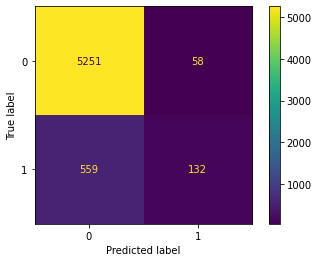

In [32]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

ROC CURVE 

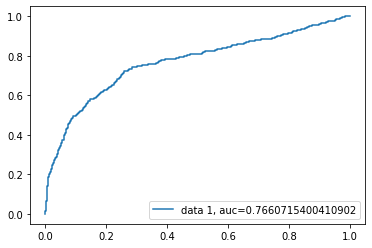

In [36]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Now Taking the threshold and fitting the Model again

In [37]:
#Threshold 
len(train_df[train_df['subscribe'] == 1])/ len(train_df)

0.11355

In [38]:
# instantiate the model 
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred_train =pd.DataFrame(logreg.predict_proba(X_train))
y_pred_test =pd.DataFrame(logreg.predict_proba(X_test))

In [39]:
y_pred_test['pred'] = np.where(y_pred_test[1] < 0.11355, 0, 1)


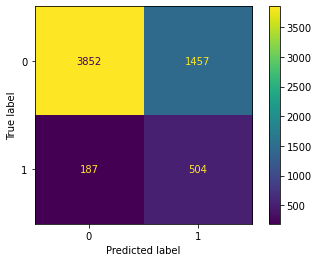

In [40]:
cm = confusion_matrix(y_test, y_pred_test['pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [41]:
from sklearn import metrics

acc_test = accuracy_score(y_test, y_pred_test['pred'])
eval_dict = {"Logistic": { "Acc_test": acc_test}}
print(eval_dict)

{'Logistic': {'Acc_test': 0.726}}


## Feature Selection

In [42]:
# Forward Stepwise Feature Selection 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(logreg,
          k_features=20,
          forward=True,
          floating=False,
          scoring = 'roc_auc',
          cv = 3)
sfs.fit(X_train, y_train)
forward_features = sfs.k_feature_names_ 
forward_features

('campaign',
 'previous',
 'emp.var.rate',
 'euribor3m',
 'job_retired',
 'job_student',
 'job_unknown',
 'marital_unknown',
 'education_basic.4y',
 'education_university.degree',
 'default_no',
 'contact_cellular',
 'month_jul',
 'month_mar',
 'month_may',
 'month_oct',
 'month_sep',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success')

In [43]:
# #Sequential backward selection(sbs)
# sbs = SFS(Lasso(),
#          k_features=20,
#          forward=False,
#          floating=False,
#          scoring = 'roc_auc',
#          cv=3)
# sbs.fit(X, y)
# back_features = sbs.k_feature_names_
# back_features


## Logistic Model With the selected Features

In [44]:
features = np.array(forward_features)

X_train_log = X_train[features] 
X_test_log = X_test[features] 

# instantiate the model 
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_log,y_train)

#Predictions
y_pred_train =pd.DataFrame(logreg.predict_proba(X_train_log))
y_pred_test =pd.DataFrame(logreg.predict_proba(X_test_log))

#Threshold
y_pred_train['pred'] = np.where(y_pred_train[1] < 0.11355, 0, 1)
y_pred_test['pred'] = np.where(y_pred_test[1] < 0.11355, 0, 1)

#Metrics
acc_train =  accuracy_score(y_train,y_pred_train['pred'])
acc_test  =  accuracy_score(y_test, y_pred_test['pred'])
train_auc =  metrics.roc_auc_score(y_train,y_pred_train['pred'])
test_auc  =  metrics.roc_auc_score(y_test, y_pred_test['pred'])
print("Logistic Train Accuracy is :"  +  str(acc_train))
print("Logistic Test  Accuracy is :"  +  str(acc_test))
print("Logistic Train AUC      is :"  +  str(train_auc))
print("Logistic Test  AUC      is :"  +  str(test_auc))


Logistic Train Accuracy is :0.7787857142857143
Logistic Test  Accuracy is :0.7893333333333333
Logistic Train AUC      is :0.7297656902912819
Logistic Test  AUC      is :0.7456338647830365


In [47]:
y_pred_test['pred'] = np.where(y_pred_test[1] < 0.11355, 0, 1)

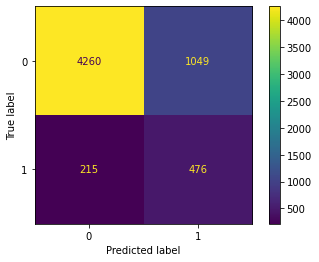

In [48]:
cm = confusion_matrix(y_test, y_pred_test['pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

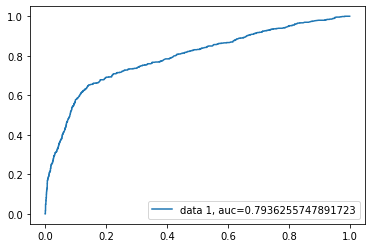

In [46]:
y_pred_proba = logreg.predict_proba(X_test_log)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## CROSS VALIDATION 

In [49]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [51]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.756 (0.026)


# DECISION TREE 

- It is evident from the metrics that the Decision Tree model is overfitting and this needs to be fixed 

In [145]:
dtc = DecisionTreeClassifier()   
dtc.fit(X_train,y_train)

y_pred_train =dtc.predict(X_train)
y_pred_test =dtc.predict(X_test)

train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  metrics.roc_auc_score(y_train,y_pred_train)
test_auc =  metrics.roc_auc_score(y_test, y_pred_test)
print("Decision Tree Train ACC is :" +  str(train_accuracy))
print("Decision Tree Test  ACC is :" +  str(test_accuracy))
print("Decision Tree Train AUC is :" +  str(train_auc))
print("Decision Tree Test  AUC is :" +  str(test_auc))

Decision Tree Train ACC is :1.0
Decision Tree Test  ACC is :0.829
Decision Tree Train AUC is :1.0
Decision Tree Test  AUC is :0.609437486898664


- Initial model with all Features

In [122]:
y_pred_test =pd.DataFrame(dtc.predict_proba(X_test))
y_pred_test['pred'] = np.where(y_pred_test[1] < 0.11355, 0, 1)

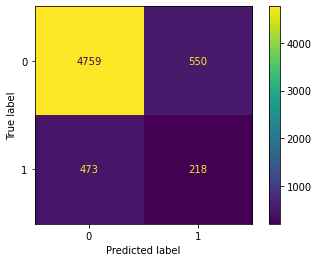

In [123]:
cm = confusion_matrix(y_test, y_pred_test['pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Forward Stewise selection using Decision Tree

In [102]:
sfs = SFS(dtc,
          k_features=20,
          forward=True,
          floating=False,
          scoring = 'roc_auc',
          cv = 3)
sfs.fit(X_train, y_train)
forward_features = sfs.k_feature_names_ 
forward_features = np.array(forward_features)
forward_features

array(['cons.price.idx', 'marital_unknown', 'education_illiterate',
       'default_unknown', 'default_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
       'month_jun', 'month_mar', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_success', 'age_group_10', 'age_group_70', 'age_group_80',
       'age_group_90'], dtype='<U20')

Decision Tree with the selected Features and Parameter Tuning 

In [103]:
X_train_dtc = X_train[forward_features]
X_test_dtc = X_test[forward_features]

In [147]:
dtc = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=7, min_samples_leaf=5)   
dtc.fit(X_train_dtc,y_train)

y_pred_train =dtc.predict(X_train_dtc)
y_pred_test =dtc.predict(X_test_dtc)

train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  metrics.roc_auc_score(y_train,y_pred_train)
test_auc =  metrics.roc_auc_score(y_test, y_pred_test)
print("Decision Tree Train Acc is :" +  str(train_accuracy) )
print("Decision Tree Test  Acc is :" +  str(test_accuracy))
print("Decision Tree Train AUC is :" +  str(train_auc) )
print("Decision Tree AUC is       :" +  str(test_auc))

Decision Tree Train Acc is :0.9006428571428572
Decision Tree Test  Acc is :0.8978333333333334
Decision Tree Train AUC is :0.5946110805356815
Decision Tree AUC is       :0.5948339098148325


- with selected Features and with threshold it is evident that the model performance is improved and now more true positive were predicted

In [109]:
y_pred_test =pd.DataFrame(dtc.predict_proba(X_test_dtc))
y_pred_test['pred'] = np.where(y_pred_test[1] < 0.11355, 0, 1)

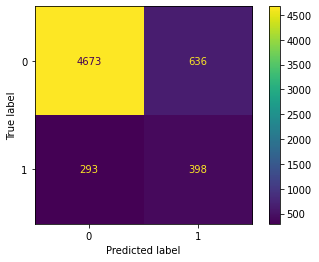

In [110]:
cm = confusion_matrix(y_test, y_pred_test['pred'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

ROC Curve - Decision Tree Final

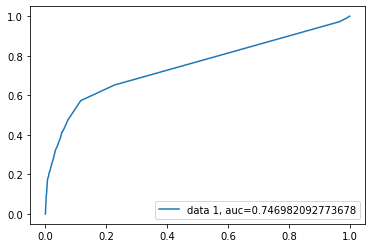

In [116]:
y_pred_proba = dtc.predict_proba(X_test_dtc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Decision Tree Cross Validation

In [148]:
# cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)
# Model
model = DecisionTreeClassifier()
# Evaluate model
scores = cross_val_score(model, X_train_dtc, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# Accuracy
print('Cross Validation Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Cross Validation Accuracy: 0.898 (0.007)


K- NEAREST NEIGHBOR

In [124]:
knn = KNeighborsClassifier()

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)  
print("Accuracy Train:" ,metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy Test :" ,metrics.accuracy_score(y_test, y_pred_test))

Accuracy Train: 0.9055714285714286
Accuracy Test : 0.8845


In [125]:
sfs = SFS(knn,
          k_features=20,
          forward=True,
          floating=False,
          scoring = 'roc_auc',
          cv = 3)

sfs.fit(X_train, y_train)
forward_features = sfs.k_feature_names_
forward_features = np.array(forward_features)
forward_features

array(['euribor3m', 'job_retired', 'education_illiterate',
       'default_unknown', 'default_yes', 'month_apr', 'month_aug',
       'month_dec', 'month_jun', 'month_mar', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'poutcome_failure', 'poutcome_success', 'age_group_10',
       'age_group_70', 'age_group_90'], dtype='<U20')

In [127]:
#taking selected features
X_train_knn = X_train[forward_features]
X_test_knn = X_test[forward_features]

In [128]:
knn = KNeighborsClassifier(n_neighbors= 7, algorithm= 'brute')

# Train the model using the training sets
knn.fit(X_train_knn,y_train)

#Predict the response for test dataset
y_pred_train = knn.predict(X_train_knn)
y_pred_test = knn.predict(X_test_knn)  
print("Accuracy Train:" ,metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy Test :" ,metrics.accuracy_score(y_test, y_pred_test))

Accuracy Train: 0.9053571428571429
Accuracy Test : 0.891


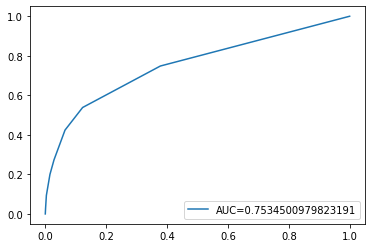

In [130]:
y_pred_proba = knn.predict_proba(X_test_knn)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [131]:
# cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)

# Evaluate model
scores = cross_val_score(knn, X_train_knn, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

# Accuracy
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.892 (0.007)


# RANDOM FOREST 

- Like Decision Tree, Random Forest also Overfits the model! Will have to look at the parameters and the features 

In [163]:
#RandomForest 
rf=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

#Predictions
y_pred_train = rf.predict(X_train)
y_pred_test=rf.predict(X_test)

#Metrics
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  metrics.roc_auc_score(y_train,y_pred_train)
test_auc =  metrics.roc_auc_score(y_test, y_pred_test)

print("Random Forest ACC Train:" + str(train_accuracy))
print("Random Forest ACC Test :" + str(test_accuracy))
print("Random Forest AUC Train:" + str(train_auc))
print("Random Forest AUC Train:" + str(test_auc))

Random Forest ACC Train:0.9998571428571429
Random Forest ACC Test :0.897
Random Forest AUC Train:0.9993670886075949
Random Forest AUC Train:0.6252040673634237


Feature selection - Random Forest 

In [151]:
sfs = SFS(rf,
          k_features = 20,
          forward    = True,
          floating   = False,
          scoring    = 'roc_auc',
          )
sfs.fit(X_train, y_train)
forward_features = sfs.k_feature_names_ 
forward_features = np.array(forward_features)
forward_features


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

array(['cons.price.idx', 'euribor3m', 'job_student', 'job_unknown',
       'contact_cellular', 'month_oct', 'poutcome_failure',
       'poutcome_success'], dtype='<U16')

In [152]:
X_train_rf = X_train[forward_features]
X_test_rf = X_test[forward_features]

In [153]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 

random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [154]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)


In [155]:
rf_random.fit(X_train_rf, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=50,
                                                    min_samples_leaf=4,
                                                    min_samples_split=10),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [156]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 5, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}  



In [170]:
rf=RandomForestClassifier(n_estimators =  2000, min_samples_leaf =  4, max_depth= 5, random_state = 42)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train_rf,y_train)

y_pred_train = rf.predict(X_train_rf)
y_pred_test=rf.predict(X_test_rf)

train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  metrics.roc_auc_score(y_train,y_pred_train)
test_auc =  metrics.roc_auc_score(y_test, y_pred_test)

print("Random Forest ACC Train:" + str(train_accuracy))
print("Random Forest ACC Test :" + str(test_accuracy))
print("Random Forest AUC Train:" + str(train_auc))
print("Random Forest AUC Train:" + str(test_auc))


# print("Accuracy Train:",metrics.accuracy_score(y_train, y_pred_train))
# print("Accuracy Test :",metrics.accuracy_score(y_test, y_pred_test))

Random Forest ACC Train:0.8996428571428572
Random Forest ACC Test :0.8981666666666667
Random Forest AUC Train:0.5818947593713691
Random Forest AUC Train:0.5836929016859392


CROSS VALIDATION - RANDOM FOREST

In [164]:
# cross-validation procedure
cv = KFold(n_splits=10, random_state=5, shuffle=True)

# Evaluate model
scores = cross_val_score(rf, X_train_rf, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# Accuracy
print('Random Forest Cross Validation: %.3f (%.3f)' % (mean(scores), std(scores)))

Random Forest Cross Validation: 0.893 (0.007)


## ADAPTIVE BOOSTING

In [336]:
from sklearn.ensemble import AdaBoostClassifier
svc=SVC(probability=True, kernel='linear')

In [94]:
# Create adaboost classifer object
abc = AdaBoostClassifier()

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predictions
y_pred_train =model.predict(X_train)
y_pred_test =model.predict(X_test)

#Metrics
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  metrics.roc_auc_score(y_train,y_pred_train)
test_auc =  metrics.roc_auc_score(y_test, y_pred_test)
print("Train ACC is :"  +  str(train_accuracy))
print("Test  ACC is :"  +  str(test_accuracy))
print("Train AUC is :"  +  str(train_auc))
print("Test  AUC is :"  +  str(test_auc))

Train ACC is :0.9005
Test  ACC is :0.898
Train AUC is :0.6033689027497503
Test  AUC is :0.6037398198019419


In [96]:
y_pred_test =pd.DataFrame(model.predict_proba(X_test))
y_pred_test['pred'] = np.where(y_pred_test[1] < 0.11355, 0, 1)

Feature Selection - ADABOOST

In [53]:
sfs = SFS(abc,
          k_features = 20,
          forward    = True,
          floating   = False,
          scoring    = 'roc_auc',
          cv         = 3)
sfs.fit(X_train, y_train)
forward_features = sfs.k_feature_names_ 
forward_features = np.array(forward_features)
forward_features

array(['cons.conf.idx', 'euribor3m', 'job_management', 'job_services',
       'job_unemployed', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_unknown',
       'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype='<U29')

In [54]:
X_train_abc = X_train[forward_features]
X_test_abc = X_test[forward_features]

In [75]:
parameters = {
    'n_estimators': [10,20,50],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 3)],
    'algorithm': ['SAMME', 'SAMME.R']
}
clf = GridSearchCV(abc, parameters, cv=5)
clf.fit(X_train_abc, y_train)
#plot_grid_search(clf)
table_grid_search(clf)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.97, 0.98, 0.99],
                         'n_estimators': [10, 20, 50]})

In [77]:
clf.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.99, 'n_estimators': 50}

In [89]:
# Create adaboost classifer object
abc = AdaBoostClassifier(algorithm = 'SAMME.R' ,learning_rate = 0.99,n_estimators = 50)

# Train Adaboost Classifer
model = abc.fit(X_train_abc, y_train)

#Predictions
y_pred_train =model.predict(X_train_abc)
y_pred_test =model.predict(X_test_abc)

#Metrics
train_accuracy = accuracy_score(y_train,y_pred_train)
test_accuracy = accuracy_score(y_test,y_pred_test)
train_auc =  metrics.roc_auc_score(y_train,y_pred_train)
test_auc =  metrics.roc_auc_score(y_test, y_pred_test)
print("Train ACC is :"  +  str(train_accuracy))
print("Test  ACC is :"  +  str(test_accuracy))
print("Train AUC is :"  +  str(train_auc))
print("Test  AUC is :"  +  str(test_auc))

Train ACC is :0.9004285714285715
Test  ACC is :0.8988333333333334
Train AUC is :0.5966998919668155
Test  AUC is :0.5953989879839794


In [90]:
y_pred_test =pd.DataFrame(model.predict_proba(X_test_abc))
y_pred_test['pred'] = np.where(y_pred_test[1] < 0.11355, 0, 1)

ROC CURVE 

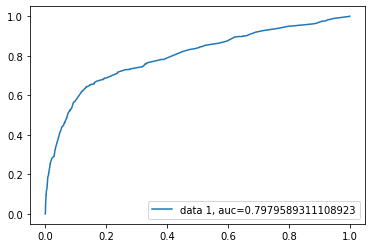

In [93]:
y_pred_proba = model.predict_proba(X_test_abc)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()